In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Loading the data sets

In [34]:
df_orders = pd.read_csv('Orders.csv')
df_orders.head()

,Customer ID,Customer Age,Customer Gender,POS,Order ID,Order Date,Item ID
0,Customer_29593,7,M,A2N,94091797,7/1/2017,Item_1
1,Customer_234955,70,F,A1X,94092557,7/1/2017,Item_1
2,Customer_821497,3,F,A0E,94092921,7/1/2017,Item_1
3,Customer_823312,3,F,A1E,94093725,7/1/2017,Item_1
4,Customer_829133,2,M,A1M,94093747,7/1/2017,Item_1


In [38]:
df_items = pd.read_csv('Items.csv')
df_items.head()

,Item ID,Item Name,Selling Price,Revenue per Item
0,Item_1,Whole Chiken,$11.99,$4.20
1,Item_10,Maxwell Greek Yogourt,$2.49,$0.87
2,Item_11,Farmers Brocoli Stalks,$1.49,$0.52
3,Item_12,Liberte Bathroom Tissue,$4.99,$1.75
4,Item_13,Cucumber Seedless,$1.25,$0.44


# Data Cleansing

## Removing '$' from the price columns

In [39]:
df_items.keys()

Index(['Item ID', 'Item Name', 'Selling Price', 'Revenue per Item'], dtype='object')

In [43]:
df_items['Selling Price'] = df_items['Selling Price'].str.replace('$','') # Removing $
df_items['Revenue per Item'] = df_items['Revenue per Item'].str.replace('$','') # Removing $
df_items.head(3)

,Item ID,Item Name,Selling Price,Revenue per Item
0,Item_1,Whole Chiken,11.99,4.20
1,Item_10,Maxwell Greek Yogourt,2.49,0.87
2,Item_11,Farmers Brocoli Stalks,1.49,0.52


## Missing Values

In [44]:
df_orders = df_orders.fillna('Unknown')
df_items = df_items.fillna('Unknown')


## Taking care of the dates

In [45]:
# Converting the date column to datetime type
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'])
df_orders.head()

,Customer ID,Customer Age,Customer Gender,POS,Order ID,Order Date,Item ID
0,Customer_29593,7,M,A2N,94091797,2017-07-01,Item_1
1,Customer_234955,70,F,A1X,94092557,2017-07-01,Item_1
2,Customer_821497,3,F,A0E,94092921,2017-07-01,Item_1
3,Customer_823312,3,F,A1E,94093725,2017-07-01,Item_1
4,Customer_829133,2,M,A1M,94093747,2017-07-01,Item_1


In [53]:
df_orders.head()

,Customer ID,Customer Age,Customer Gender,POS,Order ID,Order Date,Item ID
0,Customer_29593,7,M,A2N,94091797,2017-07-01,Item_1
1,Customer_234955,70,F,A1X,94092557,2017-07-01,Item_1
2,Customer_821497,3,F,A0E,94092921,2017-07-01,Item_1
3,Customer_823312,3,F,A1E,94093725,2017-07-01,Item_1
4,Customer_829133,2,M,A1M,94093747,2017-07-01,Item_1


In [54]:
print('There are',len(df_orders), 'items sold between', df_orders['Order Date'].min().date(),'and',df_orders['Order Date'].max().date(),'.' )
print('There are',  len(df_orders['Order ID'].unique()),'number of unique orders done by', len(df_orders['Customer ID'].unique()),'unique customers.')

There are 875813 items sold between 2017-07-01 and 2019-06-30 .
There are 842409 number of unique orders done by 209562 unique customers.


## Extracting year from the Date column

In [57]:
#df_orders['Year'] = df_orders['Order Date'].year
df_orders['year'] = pd.DatetimeIndex(df_orders['Order Date']).year
df_orders['month'] = pd.DatetimeIndex(df_orders['Order Date']).month
df_orders.head(3)

,Customer ID,Customer Age,Customer Gender,POS,Order ID,Order Date,Item ID,year,month
0,Customer_29593,7,M,A2N,94091797,2017-07-01,Item_1,2017,7
1,Customer_234955,70,F,A1X,94092557,2017-07-01,Item_1,2017,7
2,Customer_821497,3,F,A0E,94092921,2017-07-01,Item_1,2017,7


# Merging the two data sets so we have the order and price info together

In [58]:
df = df_orders.merge(df_items, how='inner', left_on = 'Item ID', right_on = 'Item ID')
df.head()

,Customer ID,Customer Age,Customer Gender,POS,Order ID,Order Date,Item ID,year,month,Item Name,Selling Price,Revenue per Item
0,Customer_29593,7,M,A2N,94091797,2017-07-01,Item_1,2017,7,Whole Chiken,11.99,4.20
1,Customer_234955,70,F,A1X,94092557,2017-07-01,Item_1,2017,7,Whole Chiken,11.99,4.20
2,Customer_821497,3,F,A0E,94092921,2017-07-01,Item_1,2017,7,Whole Chiken,11.99,4.20
3,Customer_823312,3,F,A1E,94093725,2017-07-01,Item_1,2017,7,Whole Chiken,11.99,4.20
4,Customer_829133,2,M,A1M,94093747,2017-07-01,Item_1,2017,7,Whole Chiken,11.99,4.20


# Data Analytics and Visualization

## Revenue by Year

In [116]:
df.groupby('year')['Revenue per Item'].sum()

year
2017    4.20 4.20 4.20 4.20 4.20 4.20 4.20 4.20 4.20 4...
2018    4.20 4.20 4.20 4.20 4.20 4.20 4.20 4.20 4.20 4...
2019    4.20 4.20 4.20 4.20 4.20 4.20 4.20 4.20 4.20 4...
Name: Revenue per Item, dtype: object

In [62]:
number_of_orders = df.groupby('Item Name')['Order Date'].count().sort_values(ascending=False)
number_of_orders

Item Name
Whole Chiken                    245185
Great Value Cheddar Cheese      116858
Old EI Salsa                    111995
Farmers Brocoli Stalks           82904
Frozen Fried Potato              78137
Kraft Cheese Whiz                44394
Coca-Cola 355 mL                 32739
Palmollive Lemon Dish Liquid     30569
Cucumber Seedless                28788
Royal 2 in 1 Shampoo             28725
Frozen Chiken - Cooked           15403
Great Value Cheddar Cheese5      13245
A&W Root Beer                    10161
Ben's Holsum White Bread          6630
Armstrong Cheddar Cheese          5371
NESCAFE Instant Coffee            2972
Liberte Bathroom Tissue           2944
Quaker Maple Oatmeal              2820
Great Value Havarti Cheese        2812
Source Strawberry Joice           2731
Delissio Frozen Pizza             2682
Barilla Spaghetti Pasta           2260
Pop tarts Ice Cream               1986
Pepper, Red Bell                   939
Lysol All Purpose Cleaner          741
Hungry Man Frie

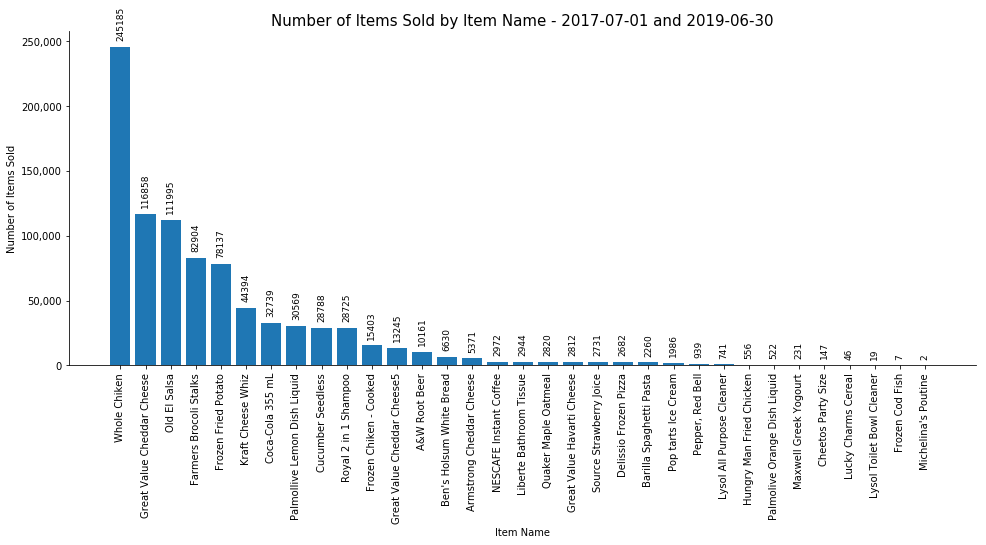

In [107]:
plt.figure(figsize=(18,8))

number_of_orders = df.groupby('Item Name')['Order Date'].count().sort_values(ascending=False)
xvals = number_of_orders.index

yvals = number_of_orders.values.tolist()

#colors = []
#for i in range(0, len(yvals)):
    #if yvals[i] < 3:
        #colors.append('#9475a3')
    #elif yvals[i] < 6.6:
        #colors.append('#94b2a3') 
    #elif yvals[i] < 10:
        #colors.append('#94f0a3')


plt.bar(xvals, yvals)
plt.xticks(rotation=90)
#plt.margins(0.2)

title = 'Number of Items Sold by Item Name - ' +  str(df_orders['Order Date'].min().date()) + ' and ' + str(df_orders['Order Date'].max().date())

plt.subplots_adjust(bottom=0.3, left=0.2) # To make sure the x axis labels are visible
plt.title(title, fontsize=15)
plt.xlabel('Item Name')
plt.ylabel('Number of Items Sold')

#Having the y axis formatted as thousand separated in case there are more than a thousand jobs
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['top'].set_visible(False) # Removing the top border
ax.spines['right'].set_visible(False) # Removing the righ border

for i, v in enumerate(yvals): # Showing the data values on top of the bars
    
    ax.text(i, v+5000, str(v),rotation=90, horizontalalignment= 'center', verticalalignment='bottom', fontsize=9) # i and v show the position of the data labels

plt.show()

In [109]:
df_chicken = df[df['Item Name']=='Whole Chiken']

In [113]:
number_of_orders_chicken = df_chicken.groupby('Order Date')['Order Date'].count().sort_index()
number_of_orders_chicken

Order Date
2017-07-01     70
2017-07-02     89
2017-07-03    116
2017-07-04    361
2017-07-05    377
2017-07-06    403
2017-07-07    291
2017-07-08    108
2017-07-09     82
2017-07-10    336
2017-07-11    388
2017-07-12    334
2017-07-13    339
2017-07-14    270
2017-07-15    111
2017-07-16     57
2017-07-17    363
2017-07-18    369
2017-07-19    297
2017-07-20    311
2017-07-21    286
2017-07-22    129
2017-07-23     62
2017-07-24    313
2017-07-25    333
2017-07-26    281
2017-07-27    276
2017-07-28    316
2017-07-29    109
2017-07-30     51
             ... 
2019-06-01    136
2019-06-02     91
2019-06-03    418
2019-06-04    372
2019-06-05    351
2019-06-06    339
2019-06-07    364
2019-06-08    123
2019-06-09     81
2019-06-10    397
2019-06-11    359
2019-06-12    345
2019-06-13    344
2019-06-14    287
2019-06-15    127
2019-06-16     69
2019-06-17    384
2019-06-18    368
2019-06-19    346
2019-06-20    331
2019-06-21    297
2019-06-22    101
2019-06-23     75
2019-06-24    343

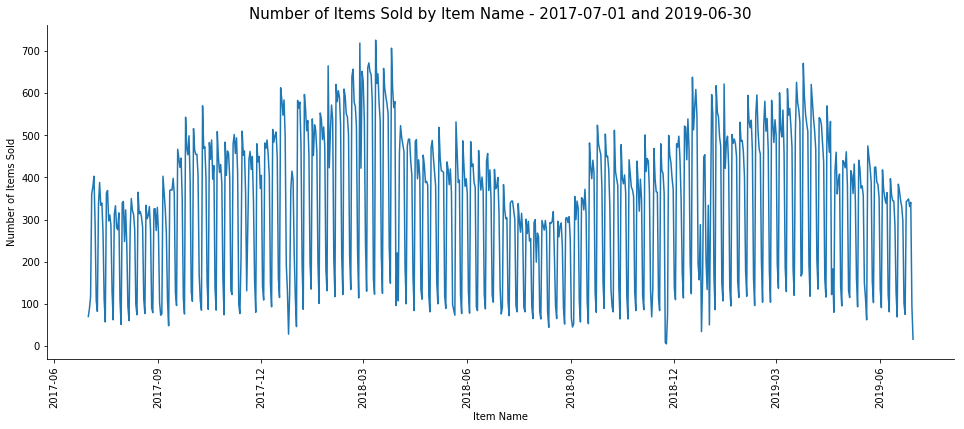

In [115]:
plt.figure(figsize=(18,8))

number_of_orders_chicken = df_chicken.groupby('Order Date')['Order Date'].count().sort_index()
xvals = number_of_orders_chicken.index

yvals = number_of_orders_chicken.values.tolist()

#colors = []
#for i in range(0, len(yvals)):
    #if yvals[i] < 3:
        #colors.append('#9475a3')
    #elif yvals[i] < 6.6:
        #colors.append('#94b2a3') 
    #elif yvals[i] < 10:
        #colors.append('#94f0a3')


plt.plot(xvals, yvals, '-')
plt.xticks(rotation=90)
#plt.margins(0.2)

title = 'Number of Items Sold by Item Name - ' +  str(df_orders['Order Date'].min().date()) + ' and ' + str(df_orders['Order Date'].max().date())

plt.subplots_adjust(bottom=0.3, left=0.2) # To make sure the x axis labels are visible
plt.title(title, fontsize=15)
plt.xlabel('Item Name')
plt.ylabel('Number of Items Sold')

#Having the y axis formatted as thousand separated in case there are more than a thousand jobs
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['top'].set_visible(False) # Removing the top border
ax.spines['right'].set_visible(False) # Removing the righ border